In [3]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_excel("HealthInformaticsProject.xlsx", sheet_name="DataFinal")

print(data.columns)

contigency= pd.crosstab(data["Worked Out"],data['Calories'],normalize='index')

# data['Github contributions'],data['Sum of Hours and Minutes Phone Usage'],data['Sum of Hours and Minutes Social Phone Usage']

# df_gh_con = data.pivot(index='Date', columns='Worked Out', values='Github contributions')

# df_cal = data.pivot(index='Date', columns='Worked Out', values='Calories')

# print(df_cal)

# for i in df_cal:
#     df_cal[i]

Index(['Date', 'Calories', 'Github contributions',
       'Sum of Hours and Minutes Phone Usage',
       'Sum of Hours and Minutes Social Phone Usage', 'Worked Out',
       'Wakatime_min'],
      dtype='object')


In [4]:
data

,Date,Calories,Github contributions,Sum of Hours and Minutes Phone Usage,Sum of Hours and Minutes Social Phone Usage,Worked Out,Wakatime_min
0,15,1708,1,368,96,1,0
1,16,2040,3,185,61,1,34
2,17,775,9,288,72,1,85
3,18,990,1,253,351,1,70
4,19,1735,3,348,80,1,110
5,20,970,1,376,63,0,0
6,21,1075,0,118,213,0,31
7,22,1225,1,213,71,0,13
8,23,1030,2,118,212,0,0
9,24,1525,0,340,106,0,0


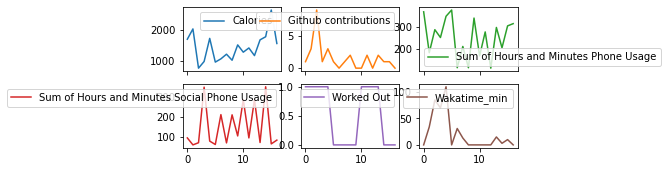

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data.drop(columns="Date").plot(subplots=True, layout=(3,3))

plt.show()

In [6]:
data_nodate = data.iloc[:,1:]
data_nodate.groupby(by=["Worked Out"]).median()

,Calories,Github contributions,Sum of Hours and Minutes Phone Usage,Sum of Hours and Minutes Social Phone Usage,Wakatime_min
Worked Out,,,,,
0,1375.0,1.0,259.0,95.5,1.5
1,1426.0,2.0,278.0,96.0,15.0


In [7]:
corr = data.drop(columns="Date").corr()

In [8]:
corr

,Calories,Github contributions,Sum of Hours and Minutes Phone Usage,Sum of Hours and Minutes Social Phone Usage,Worked Out,Wakatime_min
Calories,1.000000,-0.202341,0.258673,-0.293535,-0.058758,-0.142505
Github contributions,-0.202341,1.000000,0.156092,-0.338796,0.378489,0.622462
Sum of Hours and Minutes Phone Usage,0.258673,0.156092,1.000000,-0.593627,0.041285,0.155600
Sum of Hours and Minutes Social Phone Usage,-0.293535,-0.338796,-0.593627,1.000000,0.047759,-0.072466
Worked Out,-0.058758,0.378489,0.041285,0.047759,1.000000,0.417291
Wakatime_min,-0.142505,0.622462,0.155600,-0.072466,0.417291,1.000000


<AxesSubplot:>

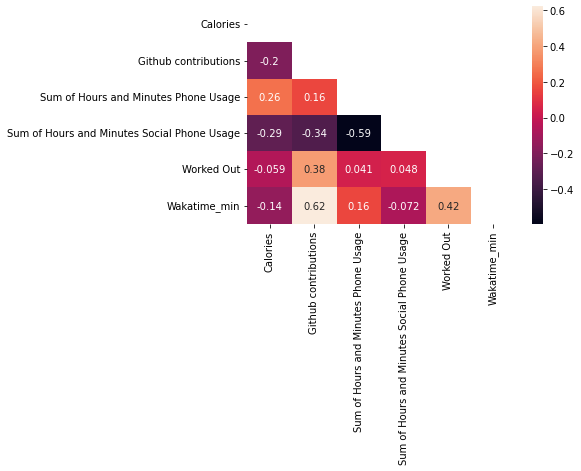

In [9]:
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True)

In [10]:
data_nodate.columns

Index(['Calories', 'Github contributions',
       'Sum of Hours and Minutes Phone Usage',
       'Sum of Hours and Minutes Social Phone Usage', 'Worked Out',
       'Wakatime_min'],
      dtype='object')

In [11]:
data_nodate.columns = ['Calories', 'GH', 'Phone_Usage', 'Social_Media_Phone_Usage','Worked Out','Wakatime']

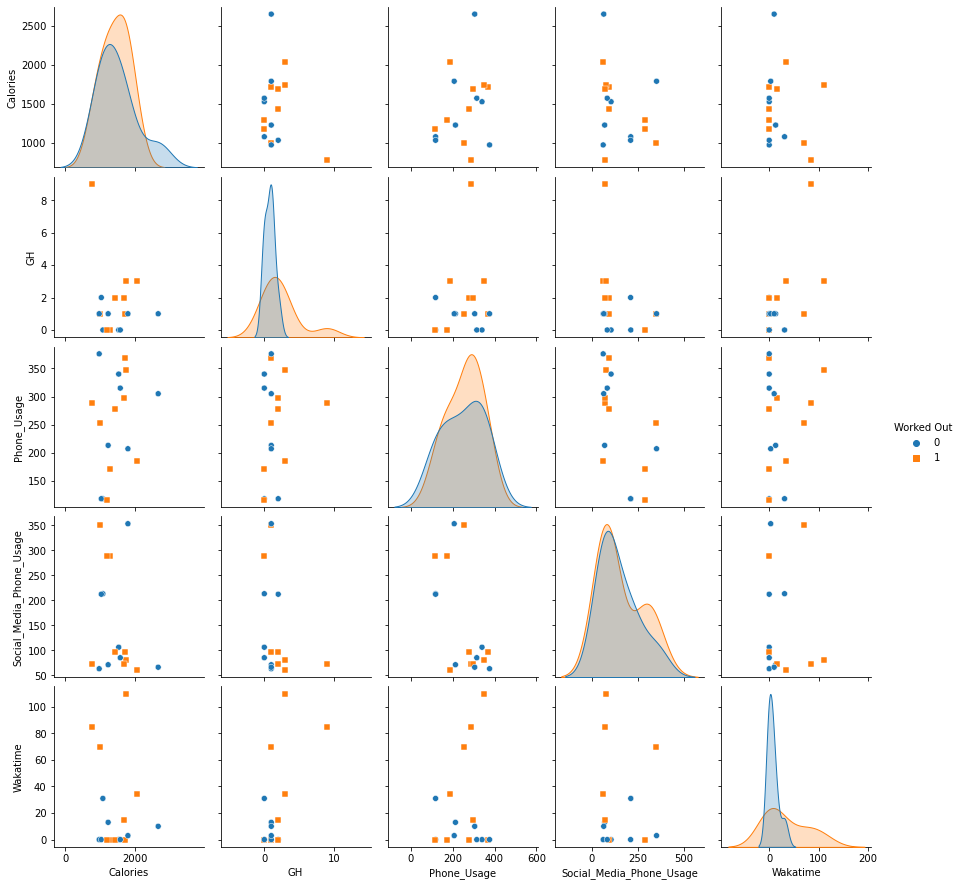

In [12]:
sns.pairplot(data_nodate,hue="Worked Out", markers=["o", "s"])

In [17]:
from scipy.stats import ttest_ind

worked_out = data_nodate[data_nodate['Worked Out']==1]
didnt = data_nodate[data_nodate['Worked Out']==0]

ttest_dict = {}

for i in data_nodate.columns:
    ttest_dict[i] = ttest_ind(worked_out[i], didnt[i])

In [18]:
ttest_dict

{'Calories': Ttest_indResult(statistic=-0.22796418372232935, pvalue=0.8227523939540946),
 'GH': Ttest_indResult(statistic=1.5836999729893613, pvalue=0.13411435361613172),
 'Phone_Usage': Ttest_indResult(statistic=0.16003271836645502, pvalue=0.874990444846983),
 'Social_Media_Phone_Usage': Ttest_indResult(statistic=0.18518005797082984, pvalue=0.8555684631927998),
 'Worked Out': Ttest_indResult(statistic=inf, pvalue=0.0),
 'Wakatime': Ttest_indResult(statistic=1.7783999793965988, pvalue=0.09560873751282482)}